In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [15]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_scaled_data = scaler.fit_transform(df_market_data)

In [20]:
# Create a DataFrame with the scaled data
df_scaled_data = pd.DataFrame(df_scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
df_scaled_data['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_scaled_data.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [32]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [33]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_scaled_data)
    inertia_values.append(kmeans.inertia_)

In [34]:


# Create a dictionary mapping each k value to its corresponding inertia value
elbow_data = {k: inertia for k, inertia in zip(k_values, inertia_values)}

# Display the dictionary to verify
print(elbow_data)

{1: 287.0, 2: 212.1233420748626, 3: 123.19048183836958, 4: 79.02243535120975, 5: 73.00280684621839, 6: 60.23452462436679, 7: 49.14126090642793, 8: 37.31305077247475, 9: 32.77876684471497, 10: 28.035593866022175, 11: 26.318991334156657}


In [39]:
# Create a dictionary with the data to plot the Elbow curve
# Create a dictionary mapping each k value to its corresponding inertia value
elbow_data = {k: inertia for k, inertia in zip(k_values, inertia_values)}



In [ ]:
# Create a DataFrame with the data to plot the Elbow curve
# Convert elbow_data dictionary to a DataFrame with 'k' and 'inertia' as columns
elbow_df = pd.DataFrame(list(elbow_data.items()), columns=['k', 'inertia'])

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,123.190482
3,4,79.022435
4,5,73.002807
5,6,60.234525
6,7,49.141261
7,8,37.313051
8,9,32.778767
9,10,28.035594


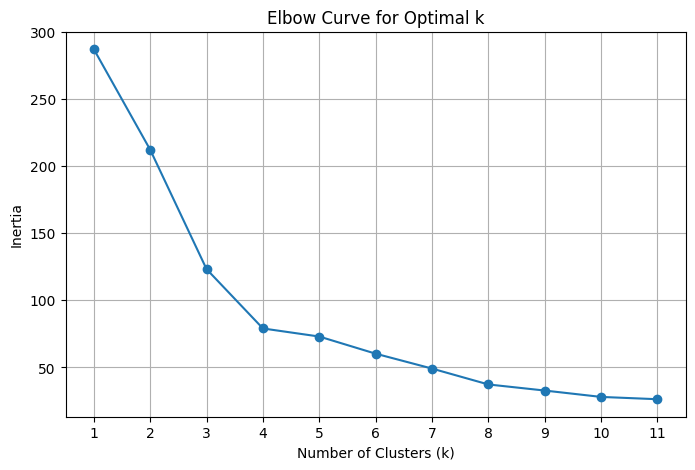

In [41]:
import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k")
plt.xticks(k_values)  # Set x-axis ticks to match k values
plt.grid(True)
plt.show()

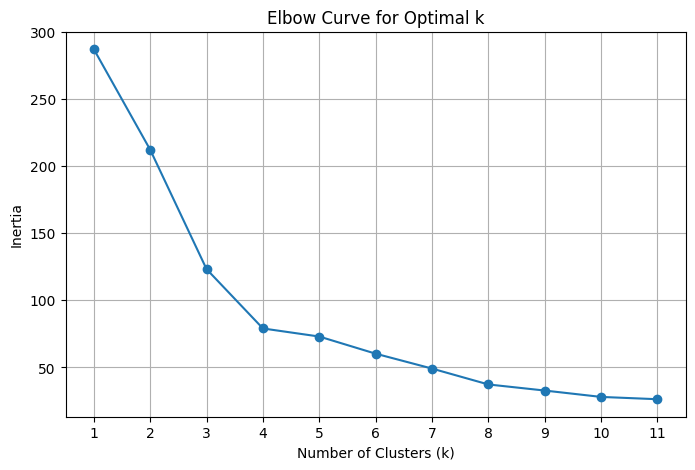

In [42]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve

import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k")
plt.xticks(k_values)  # Set x-axis ticks to match k values
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4

The best value for k is typically the point at which the Elbow curve bends, indicating that increasing k beyond this point results in only minimal decreases in inertia. This "elbow" point suggests the optimal balance between minimizing inertia and avoiding unnecessary complexity.

To determine the exact value, look at the Elbow curve plot and identify where the inertia reduction significantly slows down. This value of k likely to yield the best clustering performance without overfitting the model is : 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [56]:
# Initialize the K-Means model using the best value for k
# Initialize the KMeans model with the optimal k
kmeans_model = KMeans(n_clusters=4, random_state=13)

In [57]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled_data)

KMeans(n_clusters=4, random_state=13)

In [58]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predict_clusters = kmeans.predict(df_scaled_data)

# Print the resulting array of cluster values.

predict_clusters

array([ 5,  5,  0,  0,  3,  5,  9,  9,  5,  0,  6,  0,  0, 10,  0,  5,  6,
        0,  9,  0,  6,  5,  0,  0,  8,  0,  0,  6,  5,  4,  0,  0,  2,  5,
        6,  7,  1,  6,  5,  0,  0])

In [59]:
# Create a copy of the scaled DataFrame
clustered_df = df_scaled_data.copy()

In [77]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clustered_df["Clusters"] = predict_clusters

# Display the copy of the scaled DataFrame

clustered_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,5
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,5
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,5
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,9
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,9
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,5


In [68]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

import hvplot.pandas  # Ensure hvPlot is imported for pandas DataFrames

# Include cluster labels to the scaled df to enable colored the points
df_scaled_data['Cluster'] = kmeans_model.labels_

# Create a scatter plot with hvPlot
scatter_plot = df_scaled_data.hvplot.scatter(
    x="price_change_percentage_24h",    
    # x-axis for 24-hour price change
    y="price_change_percentage_7d",       
    # y-axis for 7-day price change
    by="Cluster",                       
    # Color by cluster labels
    hover_cols=["crypto_name"],         
    width=800,
    height=600,    # Display cryptocurrency names on hover
    title="Cryptocurrency Price Changes: 24h vs 7d"
)

# Display the plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [69]:
from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca_model = PCA(n_components=3)

In [70]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_transformed_data = pca_model.fit_transform(df_scaled_data)

# View the scaled PCA data
pca_transformed_data

array([[ 2.03409288, -0.64157137, -0.35762863],
       [ 1.99450168, -0.49054937, -0.91224962],
       [-1.06854412, -0.41720452,  0.5963108 ],
       [-1.04091865, -0.45523427,  0.4678008 ],
       [ 3.30276384, -1.24245766, -0.217276  ],
       [ 2.5056916 , -0.5758319 , -0.12938855],
       [ 2.77004172, -0.49569139, -1.89037102],
       [ 2.37244888, -0.38914627, -0.99251307],
       [ 1.8323439 , -0.67879685, -0.74158098],
       [-0.92810065, -0.74448501,  0.33333703],
       [-2.12671485, -0.19144228,  0.12953513],
       [-1.08164876, -0.42219751,  0.60254407],
       [-1.22038911, -0.66889303,  0.30088169],
       [ 3.72778359, -0.04874508,  0.65364731],
       [-0.78653763, -0.38291335,  0.30355947],
       [ 1.44866298, -0.80042381, -1.70624706],
       [-1.91257321,  0.1154045 ,  0.02017622],
       [-1.19030266, -0.45952527, -0.14487344],
       [ 2.44914105, -0.35041168, -1.13863788],
       [-1.06136261, -0.49829068,  0.6225664 ],
       [-1.60060594, -0.32126157,  0.022

In [71]:
# Retrieve the explained variance ratio for each principal component
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance
print(explained_variance)


[0.36941241 0.29169375 0.22893878]


The total explained variance of the above three principal components is the sum of the individual explained variance ratios for each principal component.

In [74]:
total_explained_variance = explained_variance.sum()
print(f"Total explained variance by the first 3 components is : {total_explained_variance:.4f}")


Total explained variance by the first 3 components is : 0.8900


The above number is mostly close to 1, indicating that the three components explain most of the variance in the dataset.

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.8900 (89%)

In [81]:
print(df_scaled_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'Cluster'],
      dtype='object')


In [85]:
# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])

# Since 'coin_id' is the index in df_scaled_data, access it directly
pca_df['coin_id'] = df_scaled_data.index

# Set 'coin_id' as the index
pca_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
pca_df


,PC1,PC2,PC3
coin_id,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250
tether,-1.068544,-0.417205,0.596311
ripple,-1.040919,-0.455234,0.467801
bitcoin-cash,3.302764,-1.242458,-0.217276
binancecoin,2.505692,-0.575832,-0.129389
chainlink,2.770042,-0.495691,-1.890371
cardano,2.372449,-0.389146,-0.992513
litecoin,1.832344,-0.678797,-0.741581


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [86]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the k_values list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [88]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia for each k value from 1 to 11
for k in range(1, 12):  # This loops from k=1 to k=11
    # Create a KMeans model using the current value of k
    kmeans = KMeans(n_clusters=k, random_state=13)  # Specify random_state for reproducibility
    
    # Fit the model to your PCA data
    kmeans.fit(pca_df)  # Replace with your actual DataFrame
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values to check the results
print(inertia_values)


[325.73473957856277, 201.2876224565441, 111.73680938677683, 40.19728442405935, 34.63001570064198, 24.378640776315564, 15.454247198555887, 12.01027496098811, 9.665632617666281, 8.48358315051404, 6.876459448976241]


In [89]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # k-values from 1 to 11
    'Inertia': inertia_values  # The inertia values calculated earlier
}
# Create a DataFrame with the data to plot the Elbow curve
import pandas as pd

elbow_df = pd.DataFrame(elbow_data)


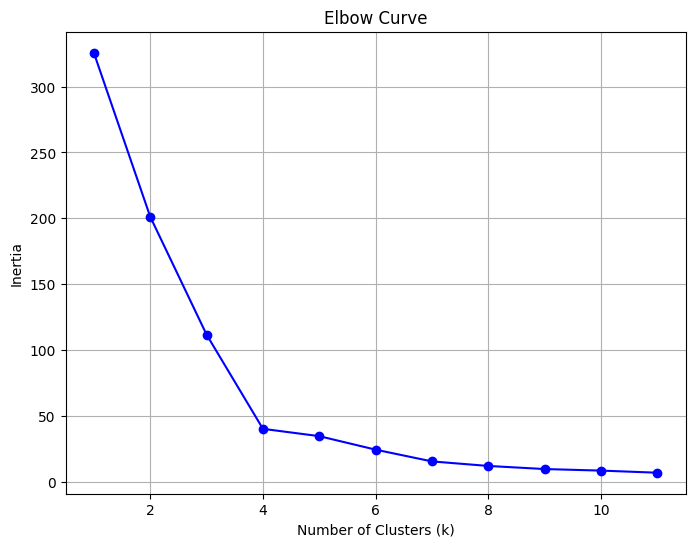

In [90]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: This value for k is NOT differrent when using the original data.  

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [95]:
# Initialize the K-Means model using the best value for k: 4 
k_best_value = 4   

# Initialize the KMeans model with the best k value
kmeans_model = KMeans(n_clusters=k_best_value, random_state=13)

In [96]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_scaled_data)

KMeans(n_clusters=4, random_state=13)

UNABLE TO RESOLVE the following code - assignment stops above 

In [106]:
# First, scale the pca_df using the same scaler that was used for df_scaled_data
pca_df = scaler.transform(pca_df)

# Apply PCA transformation to the scaled pca_df using the same PCA model used during fitting
pca_transformed_data = pca.transform(scaled_pca_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- PC1
- PC2
- PC3
Feature names seen at fit time, yet now missing:
- price_change_percentage_14d
- price_change_percentage_1y
- price_change_percentage_200d
- price_change_percentage_24h
- price_change_percentage_30d
- ...


In [104]:
# Predict the clusters using the PCA DataFrame
cluster_predictions = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values (predicted clusters)
print(cluster_predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- PC1
- PC2
- PC3
Feature names seen at fit time, yet now missing:
- Cluster
- price_change_percentage_14d
- price_change_percentage_1y
- price_change_percentage_200d
- price_change_percentage_24h
- ...


In [28]:
# Create a copy of the scaled PCA DataFrame


# Add a new column to the copy of the PCA DataFrame with the predicted clusters


# Display the copy of the scaled PCA DataFrame


In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 